In [1]:
from datetime import datetime
import time
import os
from tqdm import tqdm
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np

In [2]:
bug_df = pd.read_csv('./bug/so details(deduplication).txt')
bug_df.info()
bug_df.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41384 entries, 0 to 41383
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CreationDate   41384 non-null  object 
 1   Title          41384 non-null  object 
 2   Tags           41384 non-null  object 
 3   Score          41384 non-null  int64  
 4   AnswerCount    41384 non-null  int64  
 5   CommentCount   41384 non-null  int64  
 6   FavoriteCount  9976 non-null   float64
 7   w2v_title      41384 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 2.5+ MB


,CreationDate,Title,Tags,Score,AnswerCount,CommentCount,FavoriteCount,w2v_title
0,2012-07-10T14:09:47.123,How to enable the Java keyword assert in Eclip...,java eclipse assert assertions,64,6,1,8.0,"[0.24032320082187653, 0.42651060223579407, 0.4..."
1,2010-08-04T07:32:09.257,Calling System.gc() causing data loss in JSP,java jsp garbage-collection,0,2,6,NaN,"[0.2810627520084381, 0.4228695034980774, 0.340..."


In [3]:
non_bug_df = pd.read_csv('./non_bug/so details(deduplication).txt')
non_bug_df.info()
non_bug_df.head(2)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73344 entries, 0 to 73343
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CreationDate   73344 non-null  object 
 1   Title          73344 non-null  object 
 2   Tags           73344 non-null  object 
 3   Score          73344 non-null  int64  
 4   AnswerCount    73344 non-null  int64  
 5   CommentCount   73344 non-null  int64  
 6   FavoriteCount  17322 non-null  float64
 7   w2v_title      73344 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 4.5+ MB


,CreationDate,Title,Tags,Score,AnswerCount,CommentCount,FavoriteCount,w2v_title
0,2016-08-29T05:39:26.597,black activity giving error android studio,java android android-studio android-gradle-plugin,1,1,2,NaN,"[0.004892305005341768, 0.2929922044277191, 0.6..."
1,2015-09-17T01:13:13.000,Printing to log returns null pointer error - A...,java android nullpointerexception null,-1,1,5,NaN,"[0.44514960050582886, 0.41546085476875305, 0.5..."


In [4]:
# sum_same = 0
# for i in tqdm(range(len(bug_df))):
#     if bug_df['Title'][i] in non_bug_df['Title'].values:
#         sum_same += 1
# sum_same
df = pd.concat([bug_df, non_bug_df])
df.index = list(range(len(df)))
df = df.drop_duplicates(keep=False)
len(df)

40470

In [5]:
bug_df = df[:len(bug_df)-37129]
bug_df.index = list(range(len(bug_df)))
non_bug_df = non_bug_df[len(bug_df)-37129:]
non_bug_df.index = list(range(len(non_bug_df)))

In [6]:
bug_df.info()
bug_df.head(2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4255 entries, 0 to 4254
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CreationDate   4255 non-null   object 
 1   Title          4255 non-null   object 
 2   Tags           4255 non-null   object 
 3   Score          4255 non-null   int64  
 4   AnswerCount    4255 non-null   int64  
 5   CommentCount   4255 non-null   int64  
 6   FavoriteCount  1044 non-null   float64
 7   w2v_title      4255 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 299.2+ KB


,CreationDate,Title,Tags,Score,AnswerCount,CommentCount,FavoriteCount,w2v_title
0,2012-10-08T12:46:21.523,Stack program in Java without using built-in c...,java data-structures,0,3,4,NaN,"[0.24032320082187653, 0.42886120080947876, 0.3..."
1,2014-08-08T13:40:22.707,How to send a asynchronous response in an Unde...,java scala jboss nonblocking undertow,5,1,0,2.0,"[0.5280213356018066, 0.49340593814849854, 0.19..."


In [7]:
non_bug_df.info()
non_bug_df.head(2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32874 entries, 0 to 32873
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CreationDate   32874 non-null  object 
 1   Title          32874 non-null  object 
 2   Tags           32874 non-null  object 
 3   Score          32874 non-null  int64  
 4   AnswerCount    32874 non-null  int64  
 5   CommentCount   32874 non-null  int64  
 6   FavoriteCount  7390 non-null   float64
 7   w2v_title      32874 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 2.3+ MB


,CreationDate,Title,Tags,Score,AnswerCount,CommentCount,FavoriteCount,w2v_title
0,2016-04-24T18:41:45.000,Spring - 'No matching factory method found' fo...,java spring aop spring-data-jpa spring-aop,0,0,5,NaN,"[0.5586472749710083, 0.6344447135925293, 0.369..."
1,2017-08-07T20:48:11.610,RxJava Thread switching,java android multithreading rx-java rx-binding,0,1,1,NaN,"[0.6564114093780518, 0.27202069759368896, 0.13..."


In [59]:
# bug_df = bug_df.drop_duplicates()
# bug_df.to_csv('./bug/so details(deduplication).txt',index=False)
#
#
# non_bug_df = non_bug_df.drop_duplicates()
# non_bug_df.to_csv('./non_bug/so details(deduplication).txt',index=False)

41384

In [8]:
bug_df['w2v_title'] = bug_df['w2v_title'].apply(lambda x: eval(x))
non_bug_df['w2v_title'] = non_bug_df['w2v_title'].apply(lambda x: eval(x))

D:\ML_ENVS\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [9]:
bug_vec = np.array(bug_df['w2v_title'].tolist())
bug_vec.shape

(4255, 300)

In [10]:
non_bug_vec = np.array(non_bug_df['w2v_title'].tolist())
non_bug_vec.shape

(32874, 300)

In [11]:
from sklearn.decomposition import PCA
bug_reduced_data = PCA(n_components=2).fit_transform(bug_vec)
non_bug_reduced_data = PCA(n_components=2).fit_transform(non_bug_vec)

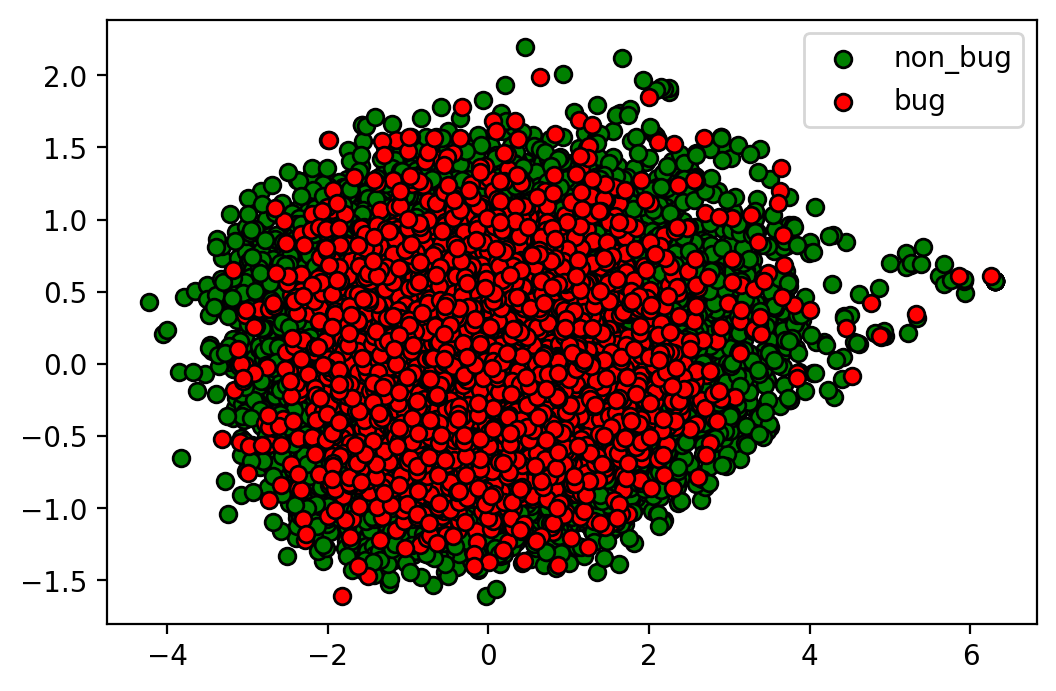

In [15]:
plt.figure(dpi=200)
x1 = bug_reduced_data
x2 = non_bug_reduced_data
plt.scatter(x2[:, 0], x2[:, 1], color='green',edgecolors='black', label='non_bug', alpha=1)
plt.scatter(x1[:, 0], x1[:, 1], color='red',edgecolors='black', label='bug',alpha=1)

# plt.title('K-means')
plt.axis('on')
plt.legend()
plt.savefig('./pic/title_vec.jpg')
# centroids = model.cluster_centers_
# plt.scatter(centroids[:, 0], centroids[:, 1],
#             marker='x', s=169, linewidths=3,
#             color='w', zorder=10)
# color_list=[ '#000080', '#006400','#00CED1', '#800000', '#800080',
#              '#CD5C5C', '#DAA520', '#E6E6FA', '#F08080', '#FFE4C4']

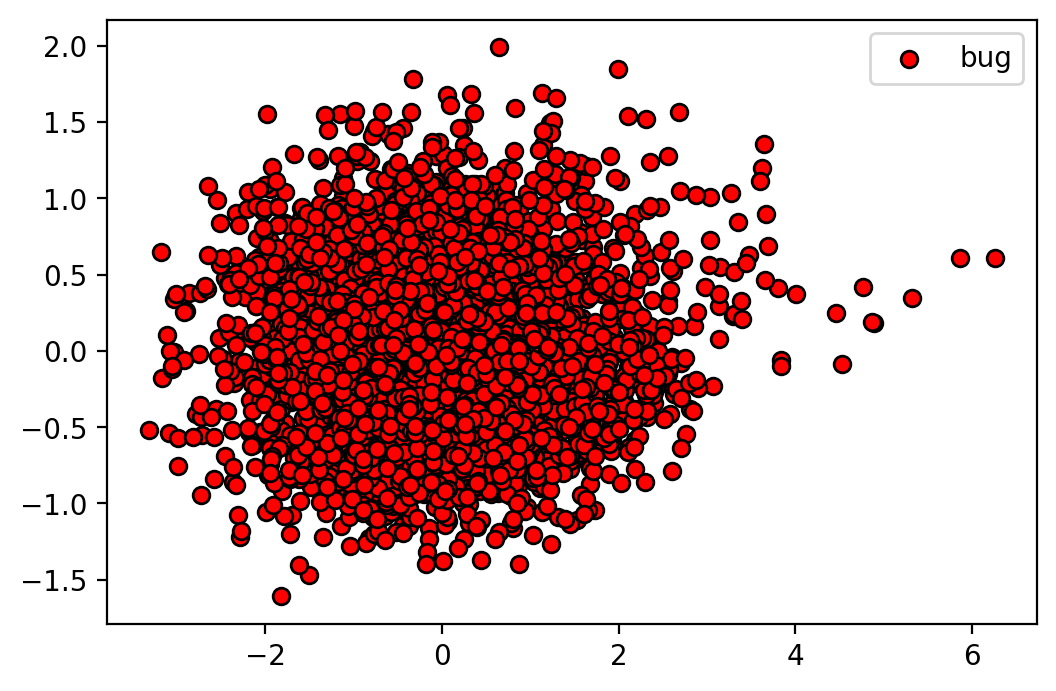

In [16]:
plt.figure(dpi=200)
color_list=[ '#000080', '#006400']



plt.scatter(x1[:, 0], x1[:, 1], color='red',edgecolors='black', label='bug',alpha=1)
# plt.scatter(x2[:, 0], x2[:, 1], color='green',edgecolors='black', label='non_bug', alpha=0.5)
# plt.title(' ')
plt.axis('on')
plt.legend()
plt.savefig('./pic/title_vec_bug.jpg')


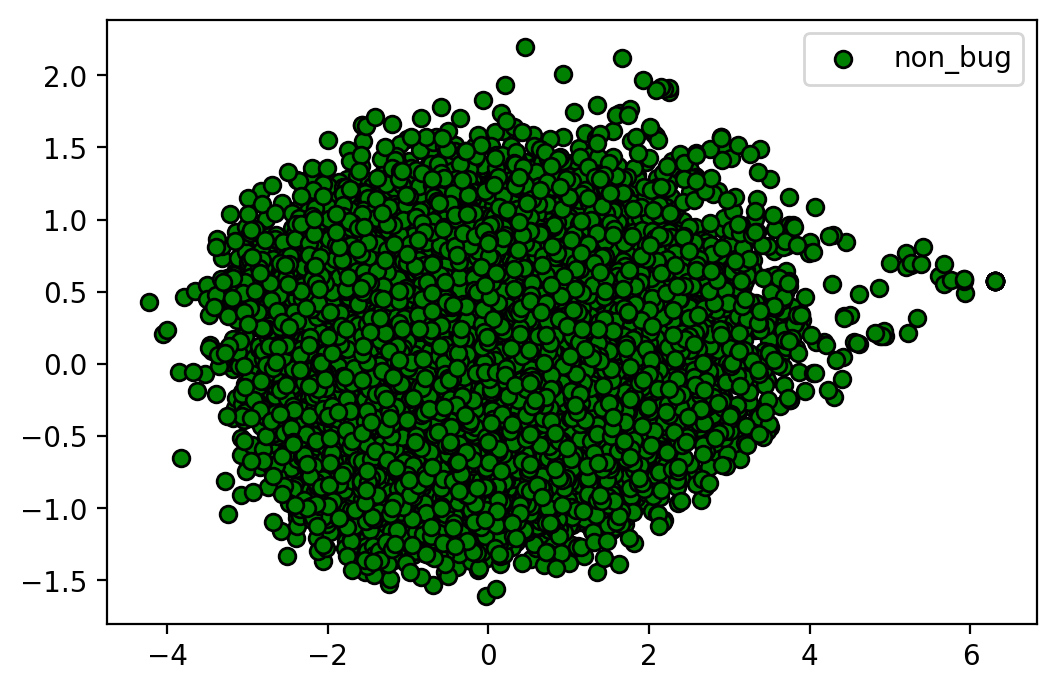

In [17]:
plt.figure(dpi=200)
x2 = non_bug_reduced_data
# plt.scatter(x1[:, 0], x1[:, 1], color='red',edgecolors='black', label='bug',alpha=0.5)
plt.scatter(x2[:, 0], x2[:, 1], color='green',edgecolors='black', label='non_bug', alpha=1)
# plt.title('K-means')
plt.axis('on')
plt.legend()
plt.savefig('./pic/title_vec_nonbug.jpg')

In [ ]:
x1.mean(axis=0)

In [129]:
x2.mean(axis=0)

array([8.05835532e-16, 8.37486643e-16])

In [140]:
x = np.random.random((1,300))
y = np.random.random((1,300))
z = np.concatenate((x, y),axis=0)
z = z.max(axis=0)
z.shape

(300,)